# SNA Final Paper Fall 2020
## Azeem Ullah - 19K0875

### Question # 1: On the constructed social network, identify the network properties.

### Constructing Social Network from Data

In [11]:
# Data was collected from SocArXiv provided for following research paper:
# The Small-World Network of College Classes: Implications for Epidemic Spread on a University Campus
# Kim A. Weeden, Benjamin Cornwell

import pandas as pd
import numpy as np
df = pd.read_csv("./Weeden_Cornwell_2020_SocSci_data.csv") 

In [12]:
df.describe()

,stid,crsid,gradstudent
count,118314.000000,118314.000000,118314.000000
mean,11513.815576,3018.463588,0.298274
std,6332.476424,1635.311710,0.457502
min,1.000000,1.000000,0.000000
25%,6014.000000,1766.000000,0.000000
50%,11695.000000,2927.000000,0.000000
75%,17191.000000,4362.000000,1.000000
max,22051.000000,6072.000000,1.000000


In [13]:
# Using 1K rows only
df = df.iloc[:10000,:]

In [14]:
# Count of # of under-grad (0) and grad (1) students in selection
df['gradstudent'].value_counts()

1    6777
0    3223
Name: gradstudent, dtype: int64

In [15]:
# Using only grad students data
prof = df[df["gradstudent"] == 1]

### Creating Network

In [16]:
import networkx as nx
Comunity=nx.from_pandas_edgelist(prof, 'stid', 'crsid', edge_attr=None ,create_using=nx.Graph())

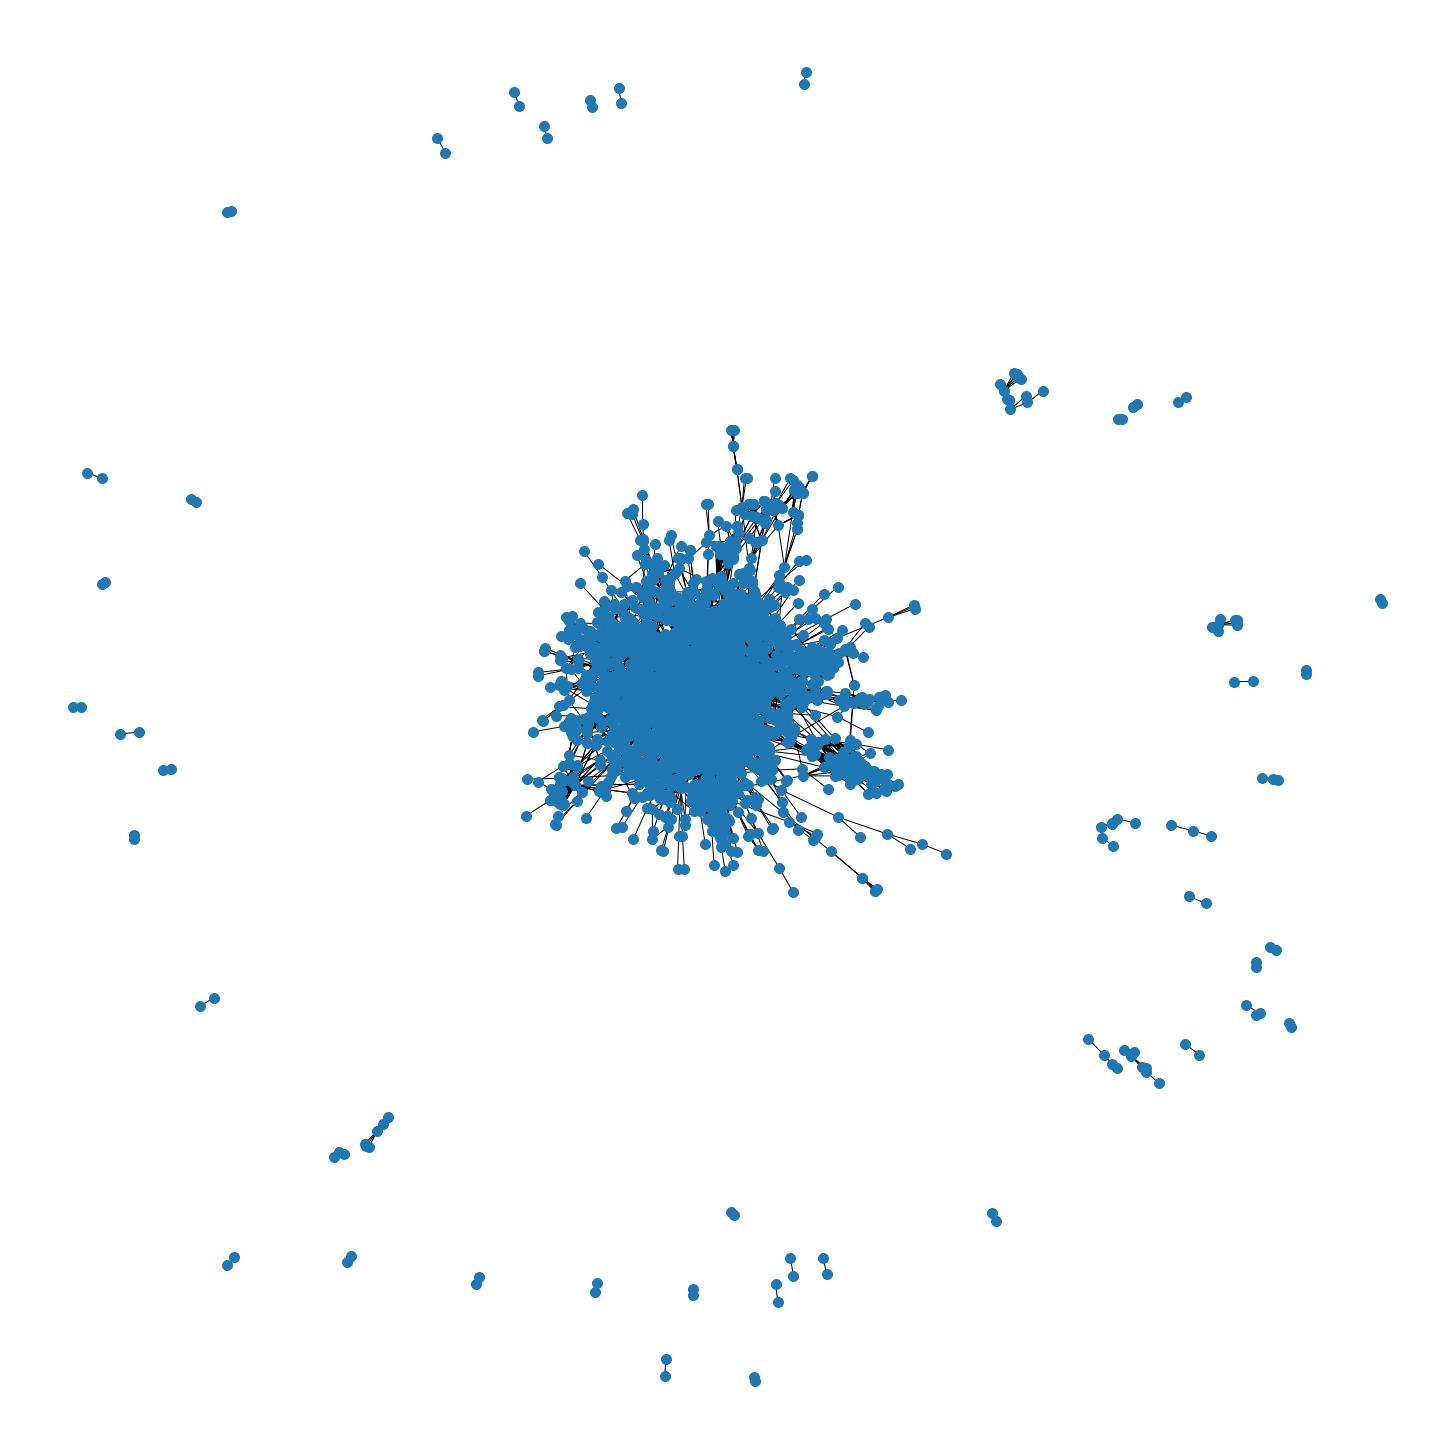

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,20))
nx.draw(Comunity,node_size=100)
plt.show()

### Network Properties

### 1.1 Degree Centrality

In [18]:
from collections import Counter
degcent = dict(nx.degree(Comunity)).values()

In [42]:
avg_cent=round((sum(degcent)/len(degcent)),4)
print("Average Degree centrality",avg_cent)

Average Degree centrality 4.6095


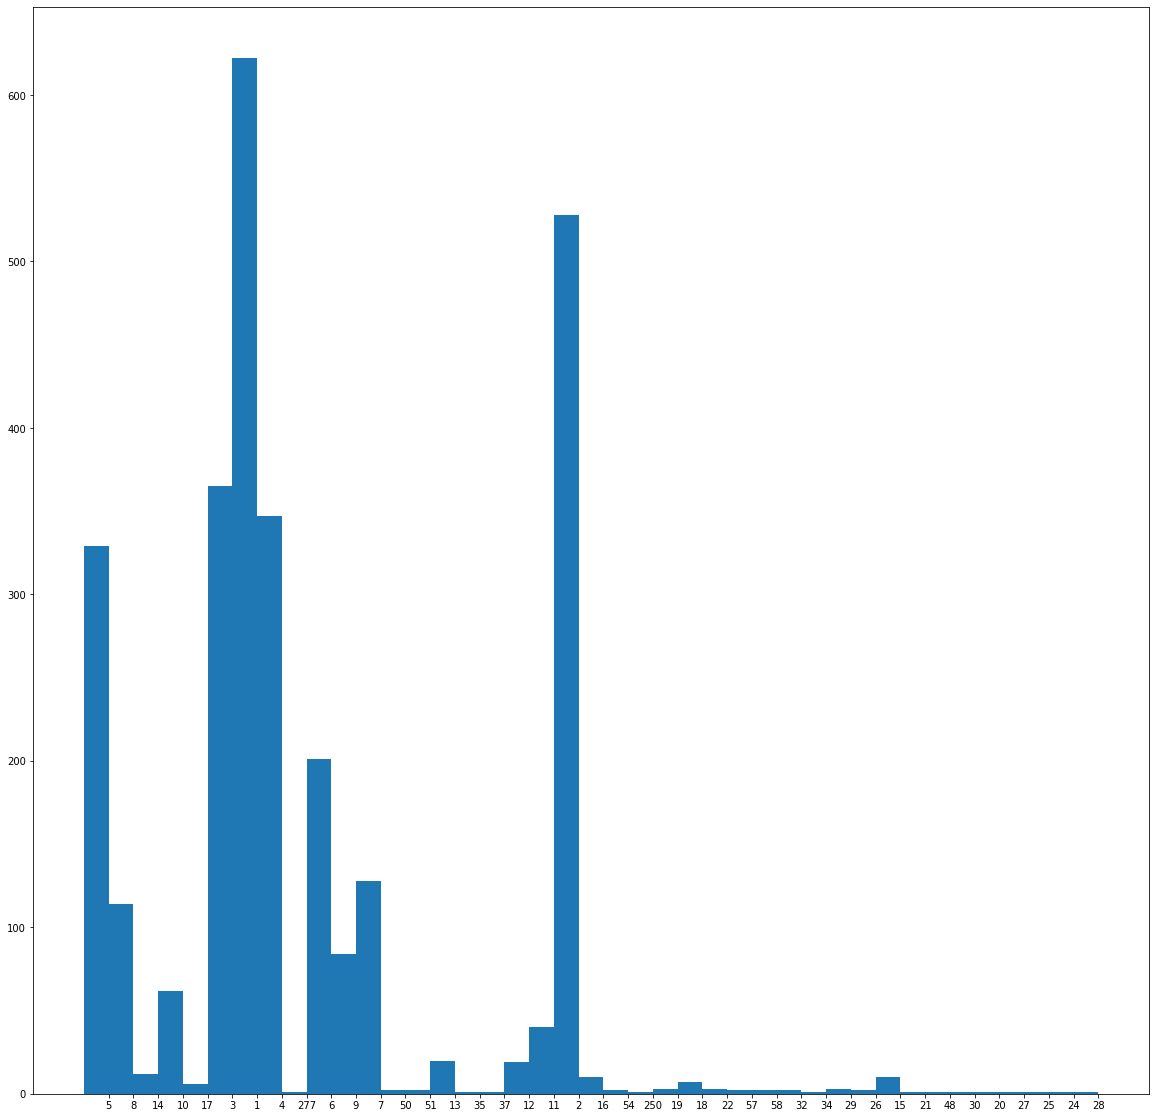

In [19]:
c = Counter(degcent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

### 1.2 Eigenvector Centrality

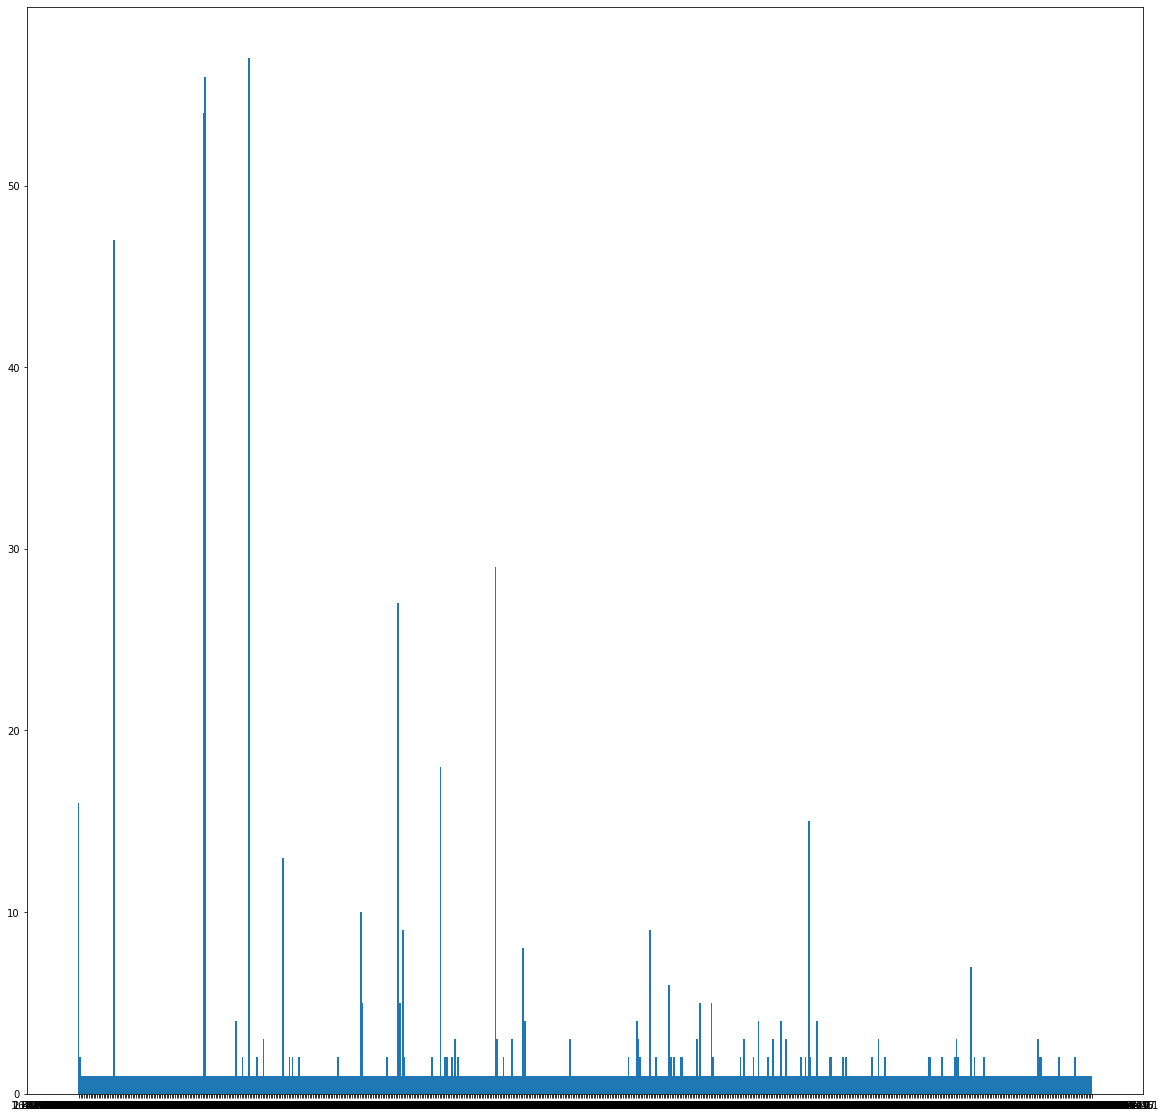

In [44]:
eigcent = dict(nx.eigenvector_centrality(Comunity)).values()
c = Counter(eigcent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

### 1.3 Closeness Centrality

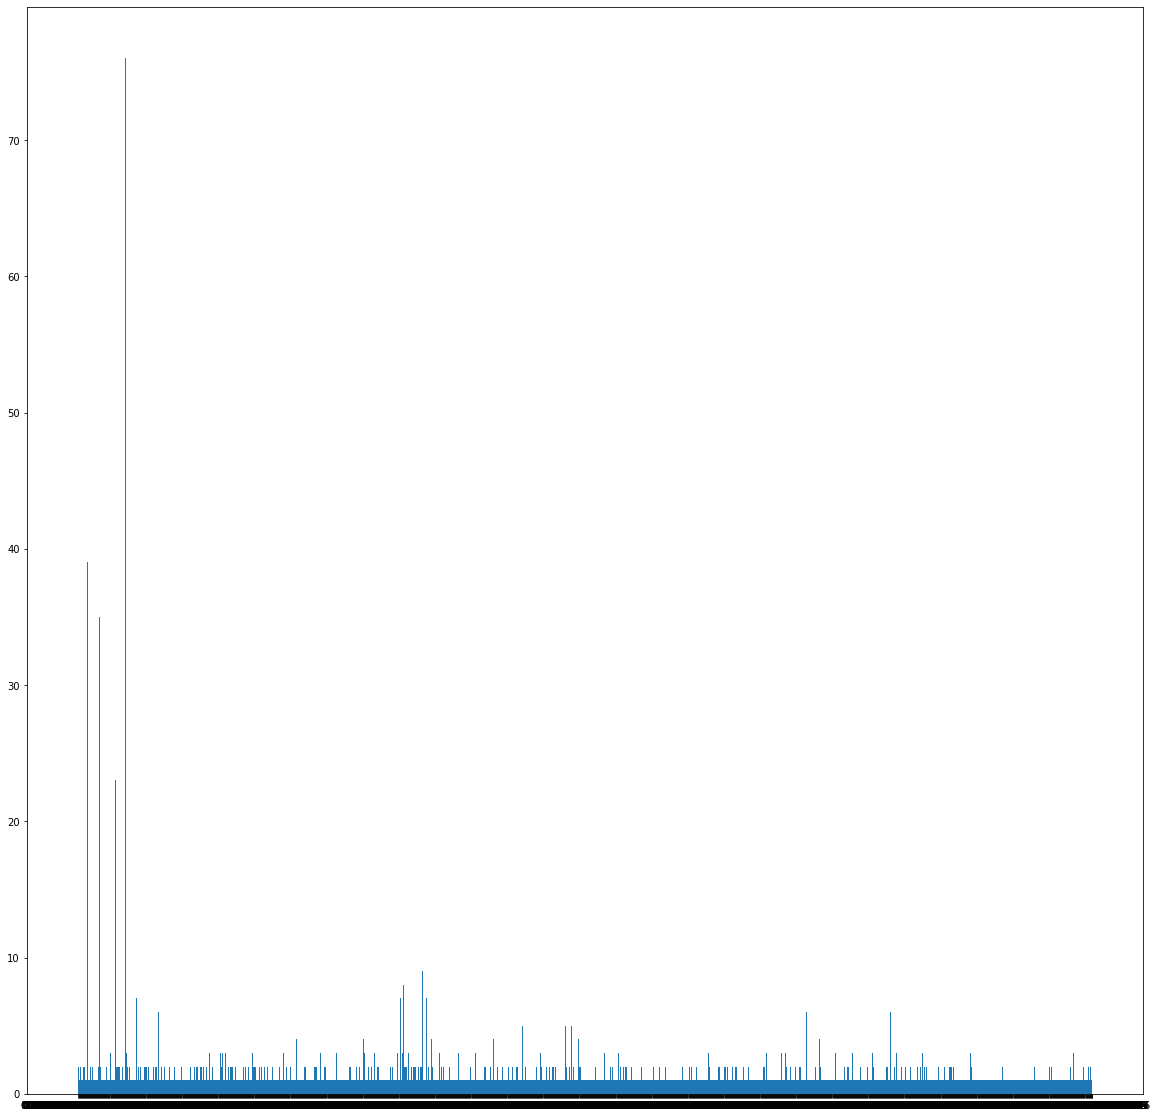

In [21]:
clocent = dict(nx.closeness_centrality(Comunity)).values()
c = Counter(clocent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

### 1.4 Betweeness Centrality

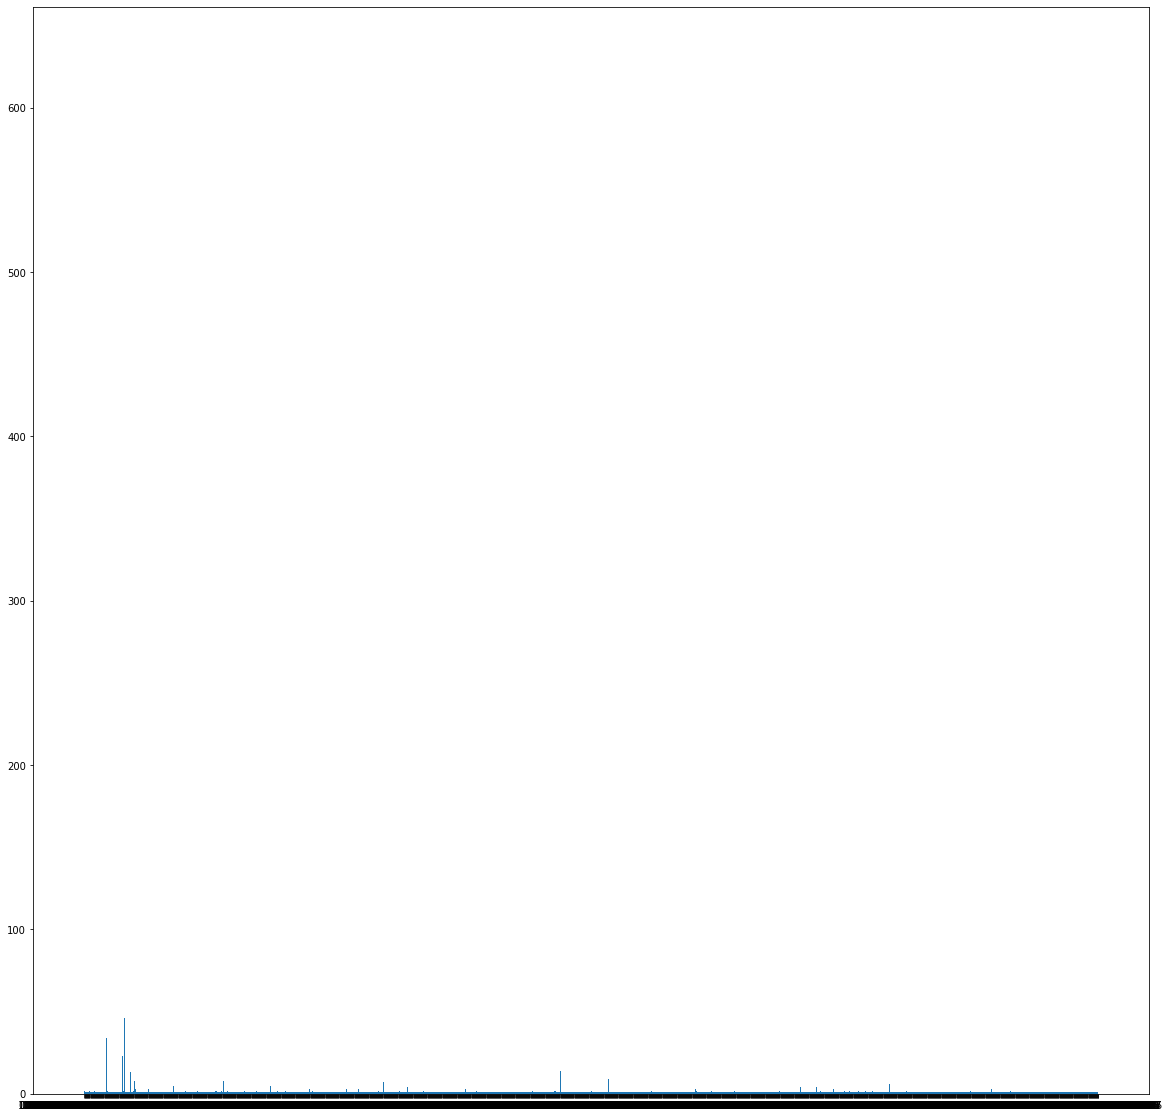

In [22]:
btwcent = dict(nx.betweenness_centrality(Comunity)).values()
c = Counter(btwcent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

### 1.5 Shortest Path Length

In [23]:
# Doesn't exist as graph is not connected fully
# avgshpath = nx.average_shortest_path_length(Comunity)

### Clustering Coefficient 

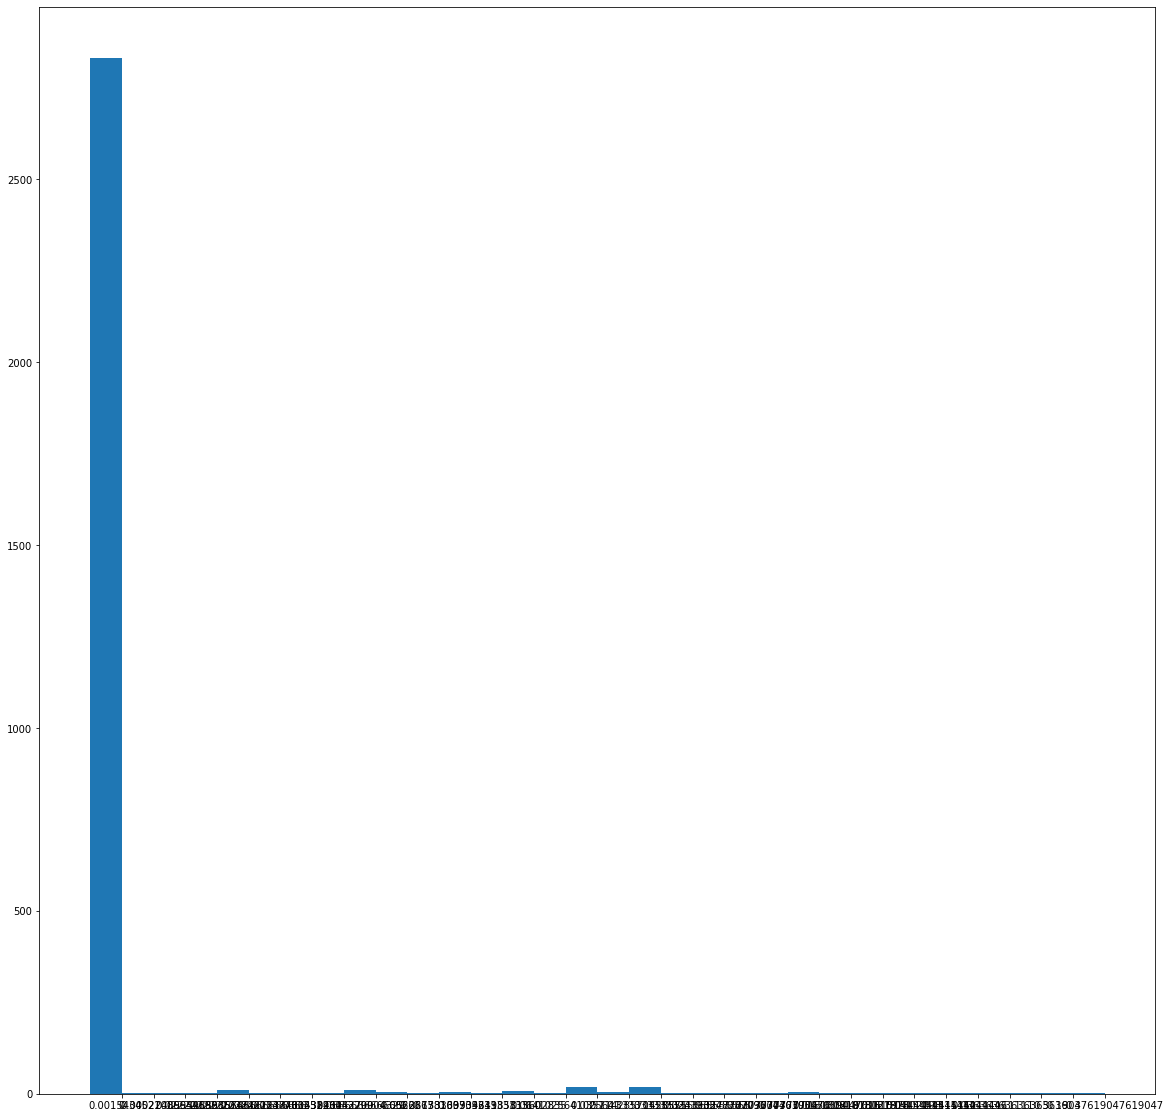

In [24]:
culcoef = dict(nx.clustering(Comunity)).values()
c = Counter(culcoef)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [45]:
community.modularity(parts,Comunity)

0.883292806508277

### Question # 2: Identify the strong-ties and weak-ties.

In [25]:
row=df.stid.unique().tolist()
col=df.crsid.unique().tolist()

from networkx.algorithms import bipartite
adjmtx=nx.algorithms.bipartite.matrix.biadjacency_matrix(Comunity,row_order=row,column_order=col)
user_matrix = adjmtx @ adjmtx.T

In [26]:
diag = user_matrix.diagonal() 
indices = np.where(diag == diag.max())[0]  
print('Number of Possible Community: {0}'.format(diag.max()))
print('User with the most interactions:')
for i in indices:
    print('- {0}'.format(row[i]))

# Set the diagonal to zero and convert it to a coordinate matrix format
user_matrix.setdiag(0)
users_coo = user_matrix.tocoo()
source=[]
target=[]
# Find pairs of users who shared Posts 
threshold=2
#max threshold can be 11
indices = np.where(users_coo.data >= threshold)[0]
print('People with most shared interactions:')
for idx in indices:
    print('- {0}, {1}'.format(row[users_coo.row[idx]], row[users_coo.col[idx]]))
    source.append(row[users_coo.row[idx]])
    target.append(row[users_coo.col[idx]])

Number of Possible Community: 15
User with the most interactions:
- 148
People with most shared interactions:
- 1, 1552
- 1, 1144
- 1, 945
- 1, 781
- 1, 702
- 1, 502
- 1, 205
- 2, 683
- 3, 640
- 3, 762
- 3, 426
- 3, 339
- 3, 505
- 3, 480
- 3, 139
- 3, 488
- 3, 171
- 3, 148
- 3, 402
- 3, 1115
- 3, 471
- 3, 151
- 3, 1613
- 3, 1148
- 3, 270
- 3, 247
- 4, 2153
- 4, 2048
- 4, 2046
- 4, 1996
- 4, 1935
- 4, 1900
- 4, 1763
- 4, 1621
- 4, 1599
- 4, 1595
- 4, 1575
- 4, 1555
- 4, 1467
- 4, 1424
- 4, 1422
- 4, 1417
- 4, 1390
- 4, 1367
- 4, 1360
- 4, 1339
- 4, 1310
- 4, 1307
- 4, 1287
- 4, 1284
- 4, 1205
- 4, 1200
- 4, 1170
- 4, 1156
- 4, 1120
- 4, 1073
- 4, 965
- 4, 949
- 4, 933
- 4, 912
- 4, 831
- 4, 806
- 4, 743
- 4, 739
- 4, 721
- 4, 676
- 4, 667
- 4, 623
- 4, 540
- 4, 498
- 4, 388
- 4, 318
- 4, 246
- 4, 164
- 4, 14
- 5, 529
- 5, 1263
- 5, 603
- 5, 489
- 5, 413
- 5, 286
- 5, 1844
- 5, 1374
- 5, 755
- 5, 692
- 5, 672
- 5, 637
- 5, 604
- 5, 548
- 5, 473
- 5, 438
- 5, 266
- 5, 258
- 5, 240
- 5, 22

/Users/azeem/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)



- 413, 240
- 413, 680
- 413, 227
- 413, 757
- 413, 754
- 413, 710
- 413, 587
- 413, 529
- 413, 1882
- 413, 1844
- 413, 1374
- 413, 1263
- 413, 692
- 413, 679
- 413, 672
- 413, 665
- 413, 637
- 413, 603
- 413, 548
- 413, 533
- 413, 504
- 413, 489
- 413, 473
- 413, 438
- 413, 431
- 413, 414
- 413, 368
- 413, 325
- 413, 307
- 413, 295
- 413, 286
- 413, 266
- 413, 258
- 413, 222
- 413, 186
- 413, 180
- 413, 129
- 413, 87
- 413, 76
- 413, 5
- 414, 477
- 414, 240
- 414, 757
- 414, 710
- 414, 587
- 414, 333
- 414, 329
- 414, 642
- 414, 577
- 414, 529
- 414, 335
- 414, 1844
- 414, 1374
- 414, 692
- 414, 672
- 414, 603
- 414, 548
- 414, 533
- 414, 473
- 414, 438
- 414, 431
- 414, 413
- 414, 368
- 414, 295
- 414, 286
- 414, 266
- 414, 258
- 414, 222
- 414, 180
- 414, 129
- 414, 114
- 415, 1203
- 415, 1233
- 415, 908
- 415, 401
- 415, 1006
- 418, 207
- 418, 75
- 419, 911
- 419, 324
- 419, 317
- 421, 878
- 421, 760
- 421, 607
- 422, 923
- 423, 1992
- 423, 1512
- 423, 1491
- 423, 1402
- 423, 1153


- 710, 1882
- 710, 1374
- 710, 755
- 710, 723
- 710, 672
- 710, 665
- 710, 431
- 710, 329
- 710, 325
- 710, 286
- 710, 258
- 710, 240
- 710, 129
- 710, 87
- 710, 1263
- 710, 757
- 710, 754
- 710, 692
- 710, 603
- 710, 587
- 710, 489
- 710, 413
- 710, 642
- 710, 621
- 710, 577
- 710, 533
- 710, 509
- 710, 436
- 710, 295
- 710, 180
- 710, 5
- 712, 2009
- 712, 1804
- 713, 1657
- 714, 207
- 714, 50
- 714, 1550
- 714, 1425
- 714, 1292
- 714, 1025
- 714, 565
- 714, 144
- 714, 75
- 715, 560
- 715, 381
- 715, 310
- 716, 1500
- 716, 1079
- 716, 859
- 716, 858
- 717, 1995
- 717, 1983
- 717, 1785
- 717, 1435
- 717, 1232
- 717, 1226
- 717, 1214
- 717, 1210
- 717, 1180
- 717, 1168
- 717, 1134
- 717, 1044
- 717, 958
- 717, 932
- 717, 866
- 717, 854
- 717, 835
- 717, 753
- 717, 747
- 717, 735
- 717, 706
- 717, 562
- 717, 524
- 717, 404
- 720, 2099
- 720, 2049
- 720, 2002
- 720, 2000
- 720, 1764
- 720, 1510
- 720, 1482
- 720, 1455
- 720, 1432
- 720, 1187
- 720, 1145
- 720, 861
- 720, 737
- 720, 675
- 

- 1010, 397
- 1010, 387
- 1010, 357
- 1010, 309
- 1010, 272
- 1010, 211
- 1010, 100
- 1010, 7
- 1011, 1720
- 1011, 1637
- 1011, 1450
- 1011, 911
- 1011, 850
- 1011, 352
- 1011, 324
- 1011, 1696
- 1011, 1529
- 1011, 1526
- 1011, 816
- 1011, 799
- 1011, 771
- 1011, 694
- 1011, 197
- 1019, 1436
- 1020, 1816
- 1020, 1143
- 1020, 1461
- 1020, 799
- 1020, 435
- 1021, 1029
- 1025, 207
- 1025, 50
- 1025, 1550
- 1025, 1425
- 1025, 1292
- 1025, 714
- 1025, 666
- 1025, 565
- 1025, 144
- 1025, 75
- 1028, 1691
- 1029, 1021
- 1031, 1083
- 1031, 595
- 1031, 394
- 1031, 371
- 1031, 143
- 1032, 377
- 1032, 216
- 1040, 1881
- 1040, 1185
- 1040, 1054
- 1040, 1047
- 1040, 1010
- 1040, 992
- 1040, 990
- 1040, 979
- 1040, 966
- 1040, 957
- 1040, 955
- 1040, 926
- 1040, 892
- 1040, 891
- 1040, 886
- 1040, 873
- 1040, 867
- 1040, 851
- 1040, 840
- 1040, 838
- 1040, 834
- 1040, 829
- 1040, 827
- 1040, 819
- 1040, 813
- 1040, 748
- 1040, 700
- 1040, 688
- 1040, 682
- 1040, 674
- 1040, 660
- 1040, 647
- 1040, 64

- 1607, 573
- 1607, 570
- 1607, 306
- 1607, 245
- 1607, 242
- 1607, 241
- 1607, 157
- 1608, 1752
- 1608, 1737
- 1608, 1640
- 1610, 1675
- 1610, 1644
- 1610, 1049
- 1610, 395
- 1610, 122
- 1611, 1779
- 1613, 230
- 1613, 80
- 1613, 426
- 1613, 339
- 1613, 148
- 1613, 1115
- 1613, 471
- 1613, 151
- 1613, 1148
- 1613, 270
- 1613, 247
- 1613, 3
- 1614, 1580
- 1615, 871
- 1615, 1811
- 1615, 1810
- 1615, 1784
- 1615, 1742
- 1615, 1739
- 1615, 1721
- 1615, 1719
- 1615, 1654
- 1615, 1556
- 1615, 1547
- 1615, 1515
- 1615, 1418
- 1615, 1416
- 1615, 1410
- 1615, 1359
- 1615, 1312
- 1615, 1296
- 1615, 1294
- 1615, 1286
- 1615, 1276
- 1615, 1264
- 1615, 1259
- 1615, 1230
- 1615, 1225
- 1615, 1175
- 1615, 1110
- 1615, 983
- 1615, 971
- 1615, 962
- 1615, 940
- 1615, 936
- 1615, 935
- 1615, 924
- 1615, 920
- 1615, 913
- 1615, 900
- 1615, 889
- 1615, 868
- 1615, 824
- 1615, 798
- 1615, 765
- 1615, 744
- 1615, 742
- 1615, 741
- 1615, 724
- 1615, 615
- 1615, 589
- 1615, 536
- 1615, 501
- 1615, 490
- 1615,

In [27]:
sim=pd.DataFrame()
sim['source']=source
sim['target']=target

In [28]:
lst = sim['source'].value_counts(ascending=True)
print("Week ties:\n",lst[:10])

print("\n\n")

lst = sim['source'].value_counts(ascending=False)
print("Strong ties:\n",lst[:10])

Week ties:
 152     1
1499    1
804     1
162     1
13      1
194     1
984     1
77      1
713     1
836     1
Name: source, dtype: int64



Strong ties:
 1276    60
940     57
798     57
1556    57
1654    57
433     57
1515    57
429     57
536     57
1547    57
Name: source, dtype: int64


In [29]:
Comunity=nx.from_pandas_edgelist(sim, 'source', 'target', edge_attr=None ,create_using=nx.Graph())

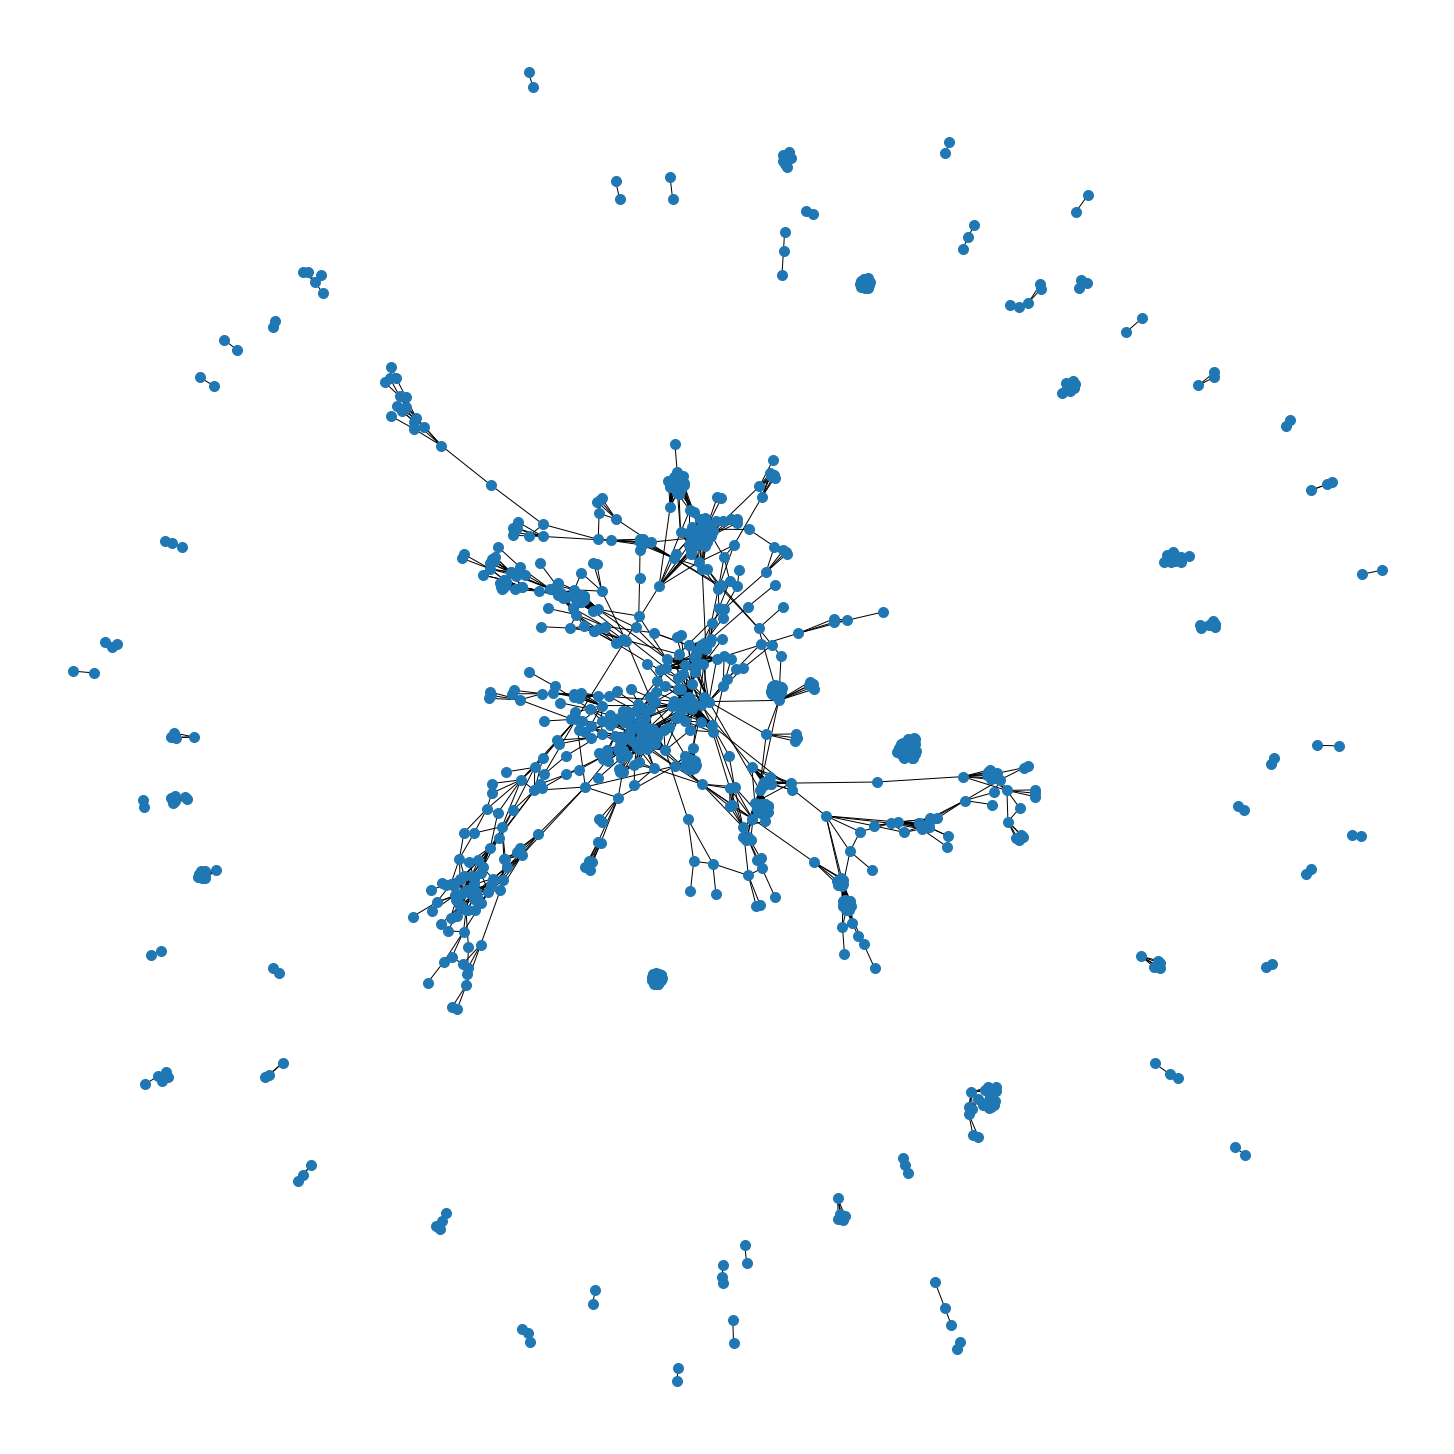

In [30]:
plt.figure(figsize=(20,20))
nx.draw(Comunity,node_size=100)

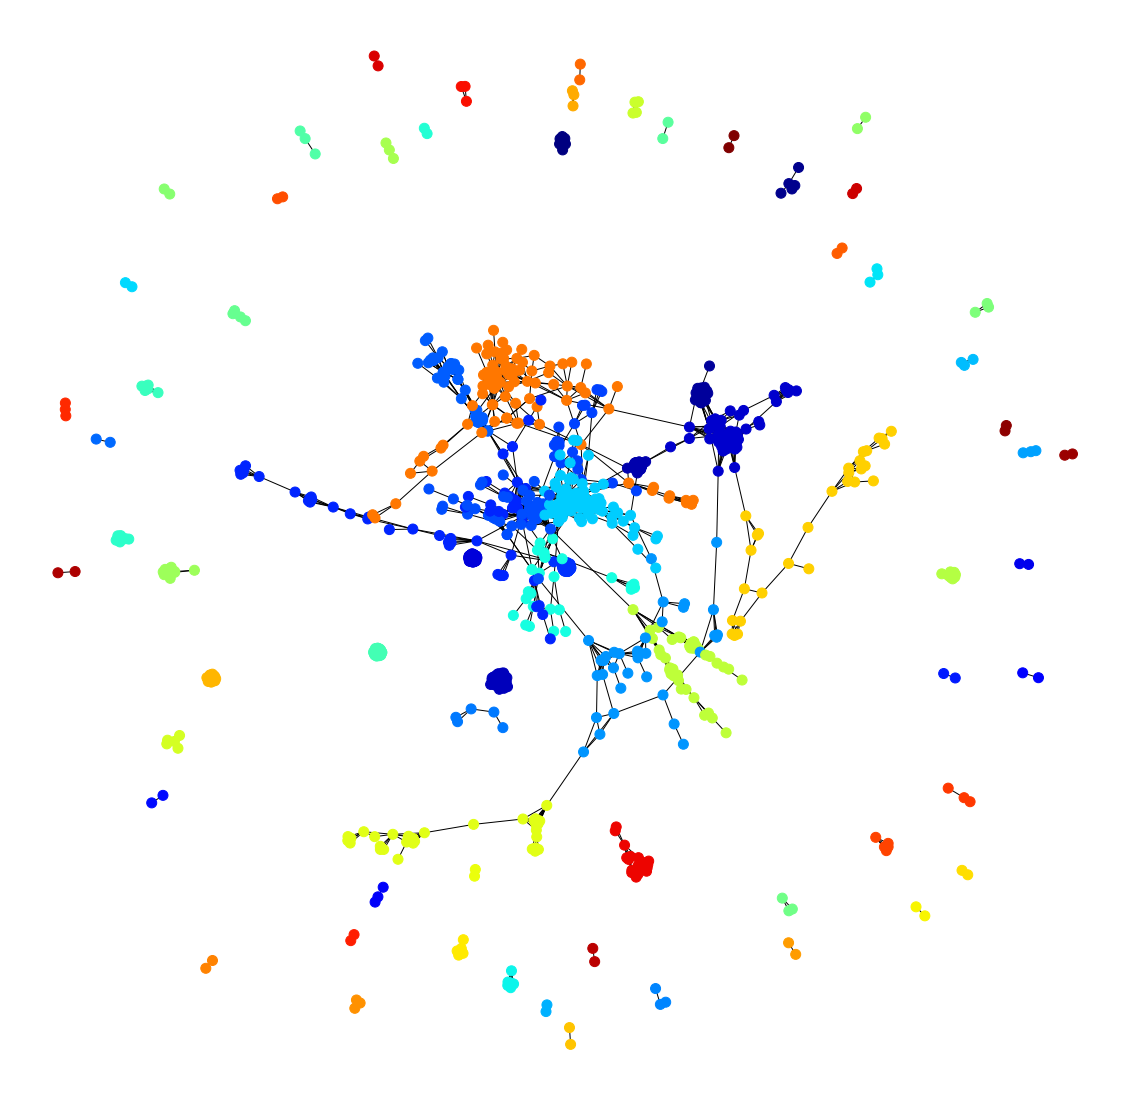

In [31]:
#!pip install community
#!pip install python-louvain
#!pip install --upgrade networkx

import community
spring_pos = nx.spring_layout(Comunity)
parts = community.best_partition(Comunity)
values = [parts.get(node) for node in Comunity.nodes()]
plt.figure(figsize=(20,20))
plt.axis("off")
nx.draw_networkx(Comunity, pos=spring_pos, cmap=plt.get_cmap("jet"), node_color=values, node_size=100, with_labels=False)
plt.show()

In [32]:
community.modularity(parts,Comunity)

0.883292806508277

In [33]:
print(np.unique(values).max())

74


In [34]:
result = [(node, len(list(Comunity.neighbors(node)))) for node in Comunity.nodes()]
max(result, key=lambda node:node[1])

(1276, 60)

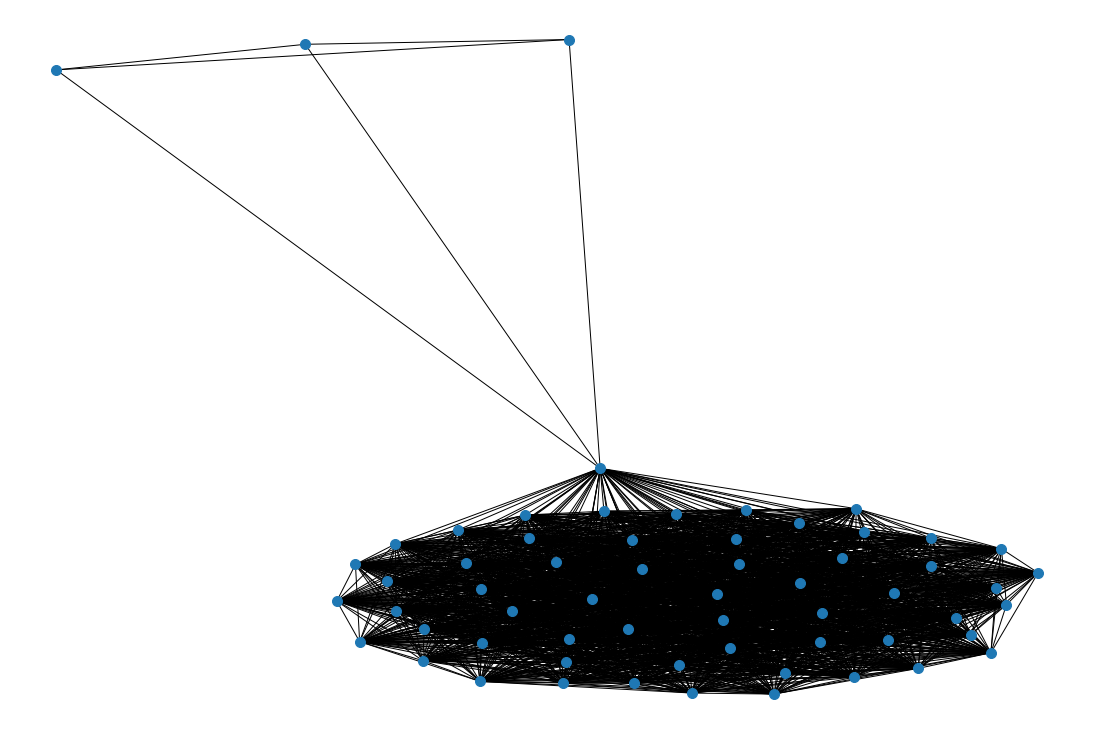

In [35]:
# Network on 1276
Graph_1276 = nx.Graph(nx.ego_graph(Comunity, 1276, radius = 1))
plt.figure(3,figsize=(15,10)) 
nx.draw(Graph_1276, node_size=100,with_labels = False)

In [36]:
users_coo.data.max()

10

In [37]:
Comunity.degree[1276]

60

In [38]:
# Get community degree for all the users here by looping and then sort desc by degree to get most influeential ones

In [39]:
# Occurance metrix
ocurancMtx=pd.DataFrame(adjmtx.todense(),index=row,columns=col)

In [40]:
ocurancMtx

,3533,3532,3525,3520,3515,5334,5325,2850,4354,4347,...,77,4858,5129,5828,5644,1536,2861,2530,4834,4900
1,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Question 3: Remove the most influential nodes from the social network and repeat the task (1 &amp; 2).

In [46]:
# Most influential node is student id 1276; therefore removing it.
Comunity.remove_node(1276)
Comunity.remove_node(940)
Comunity.remove_node(798)
Comunity.remove_node(1556)
Comunity.remove_node(1654)
Comunity.remove_node(433)
Comunity.remove_node(1515)
Comunity.remove_node(429)
Comunity.remove_node(536)
Comunity.remove_node(1547)

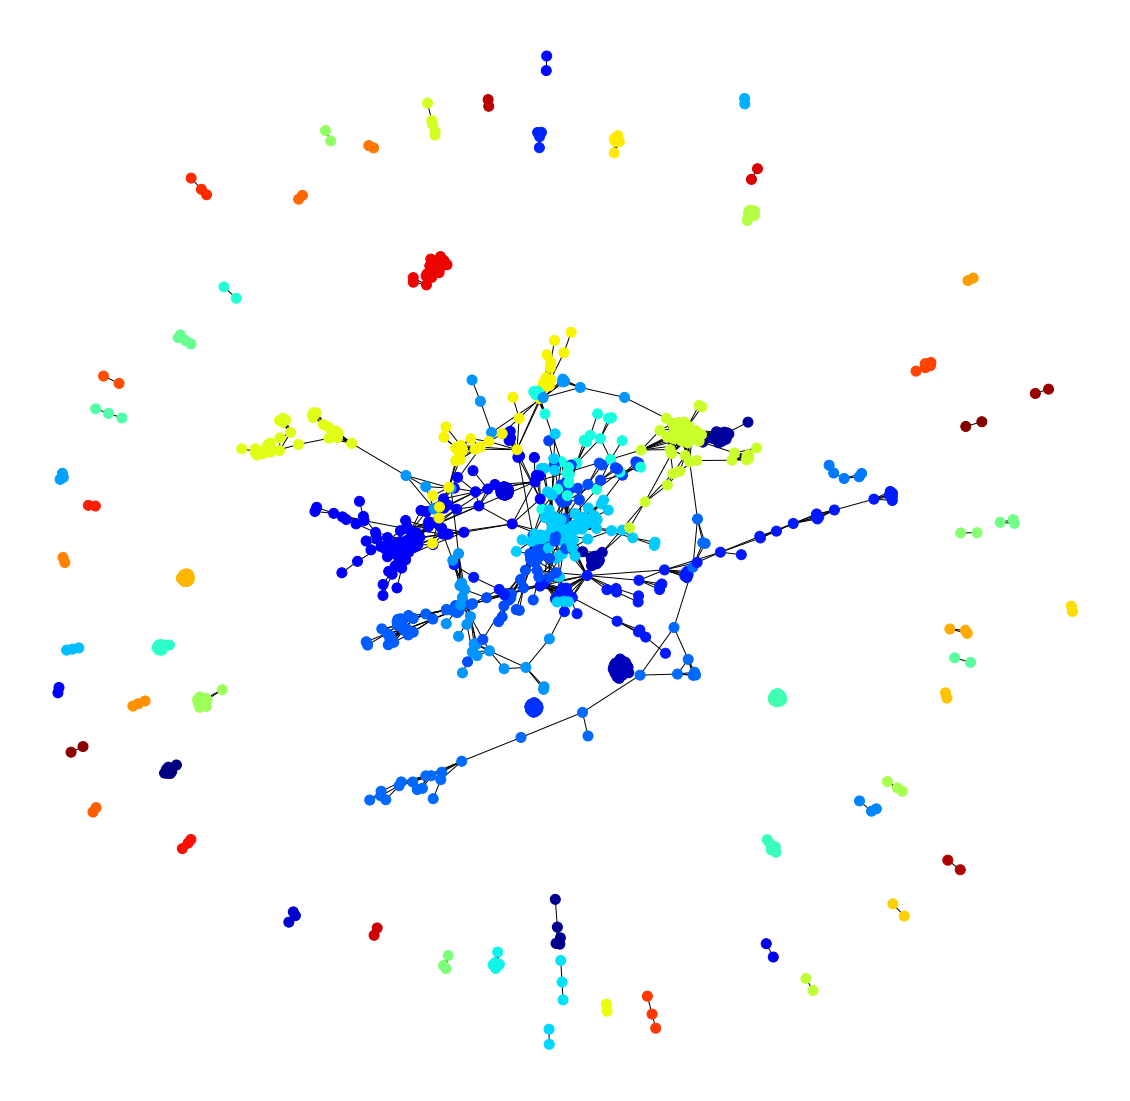

In [47]:
spring_pos = nx.spring_layout(Comunity)
parts = community.best_partition(Comunity)
values = [parts.get(node) for node in Comunity.nodes()]
plt.figure(figsize=(20,20))
plt.axis("off")
nx.draw_networkx(Comunity, pos=spring_pos, cmap=plt.get_cmap("jet"), node_color=values, node_size=100, with_labels=False)
plt.show()

In [48]:
result = [(node, len(list(Comunity.neighbors(node)))) for node in Comunity.nodes()]
max(result, key=lambda node:node[1])

(180, 57)

In [49]:
community.modularity(parts,Comunity)

0.8896910313445008

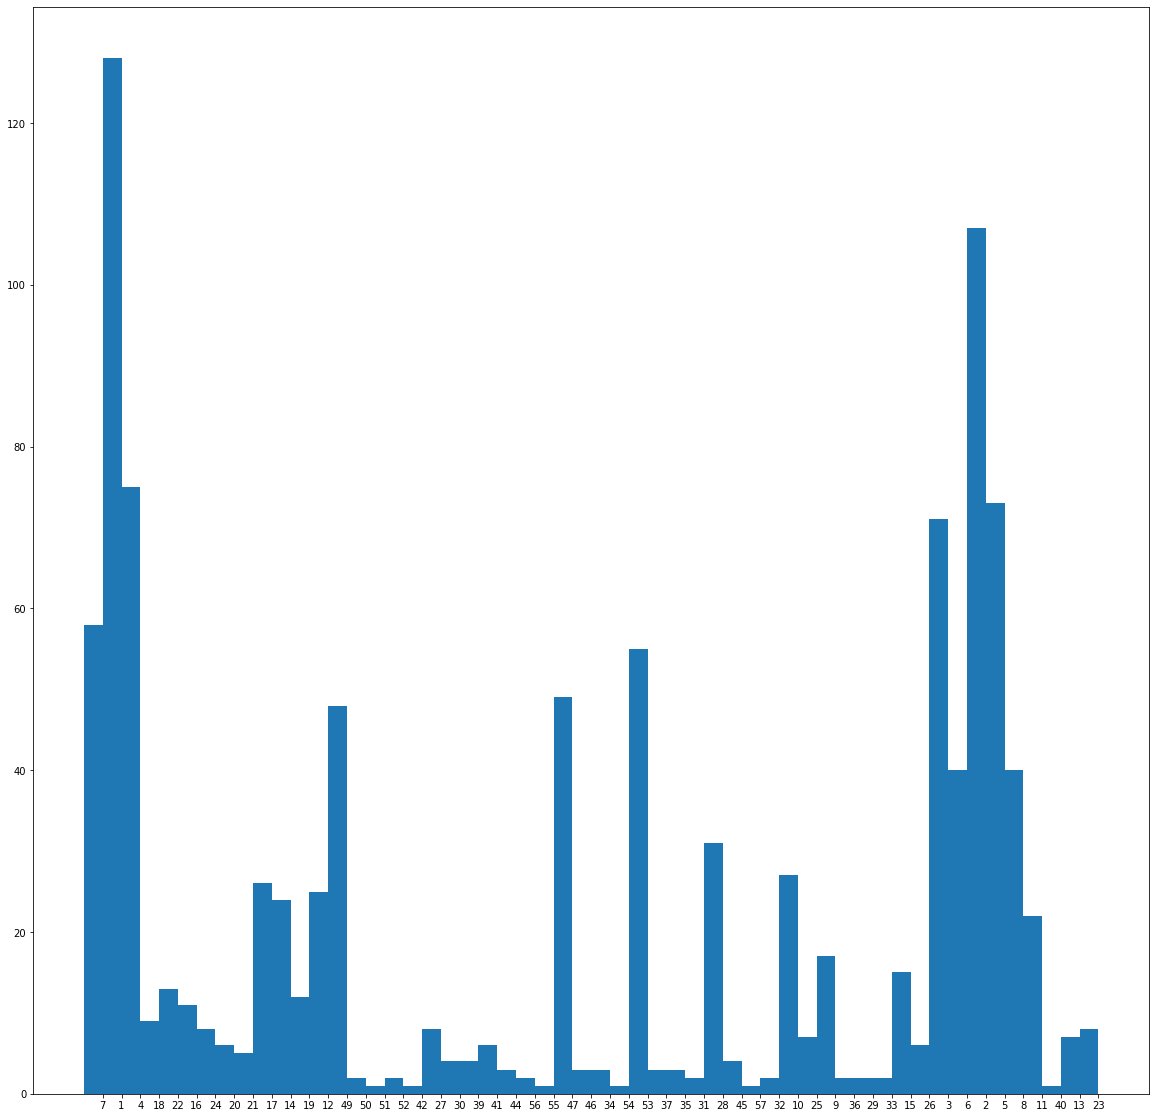

In [50]:
degcent = dict(nx.degree(Comunity)).values()
c = Counter(degcent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [51]:
avg_cent=round((sum(degcent)/len(degcent)),4)
print("Average Degree centrality",avg_cent)

Average Degree centrality 15.5709


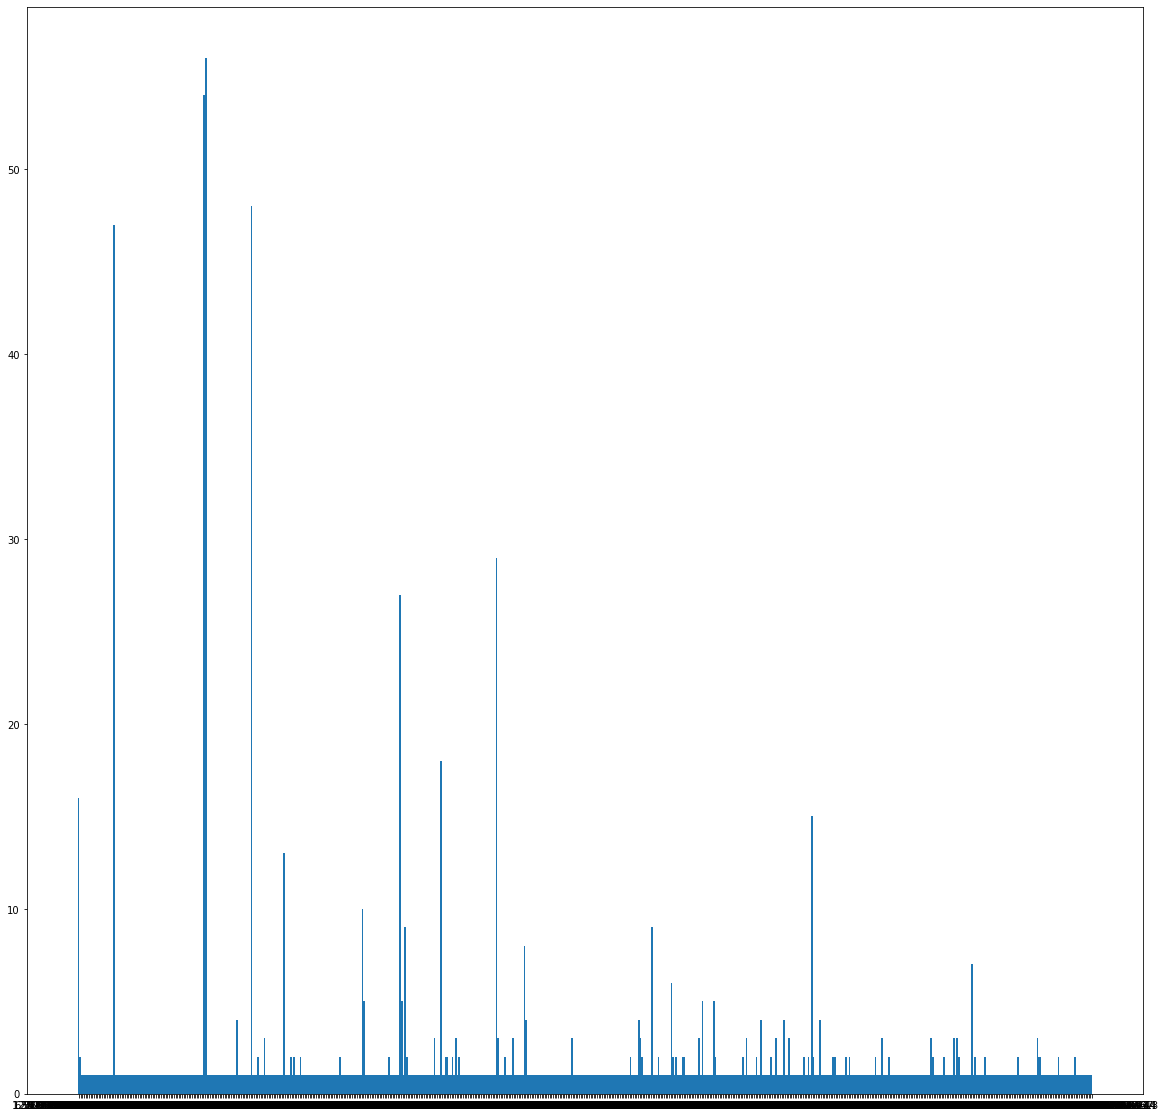

In [52]:
eigcent = dict(nx.eigenvector_centrality(Comunity)).values()
c = Counter(eigcent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

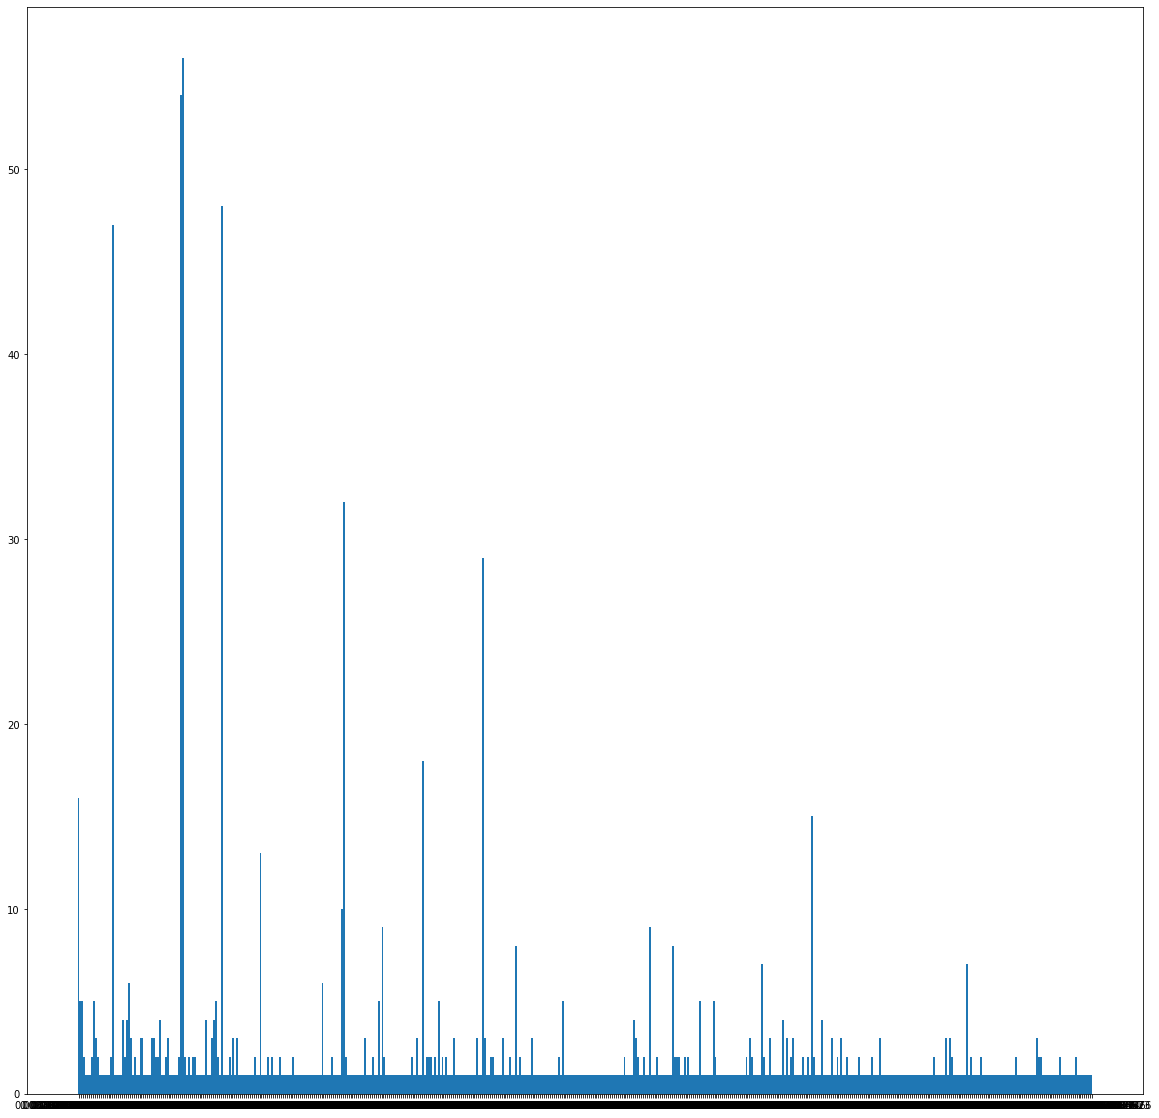

In [53]:
clocent = dict(nx.closeness_centrality(Comunity)).values()
c = Counter(clocent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

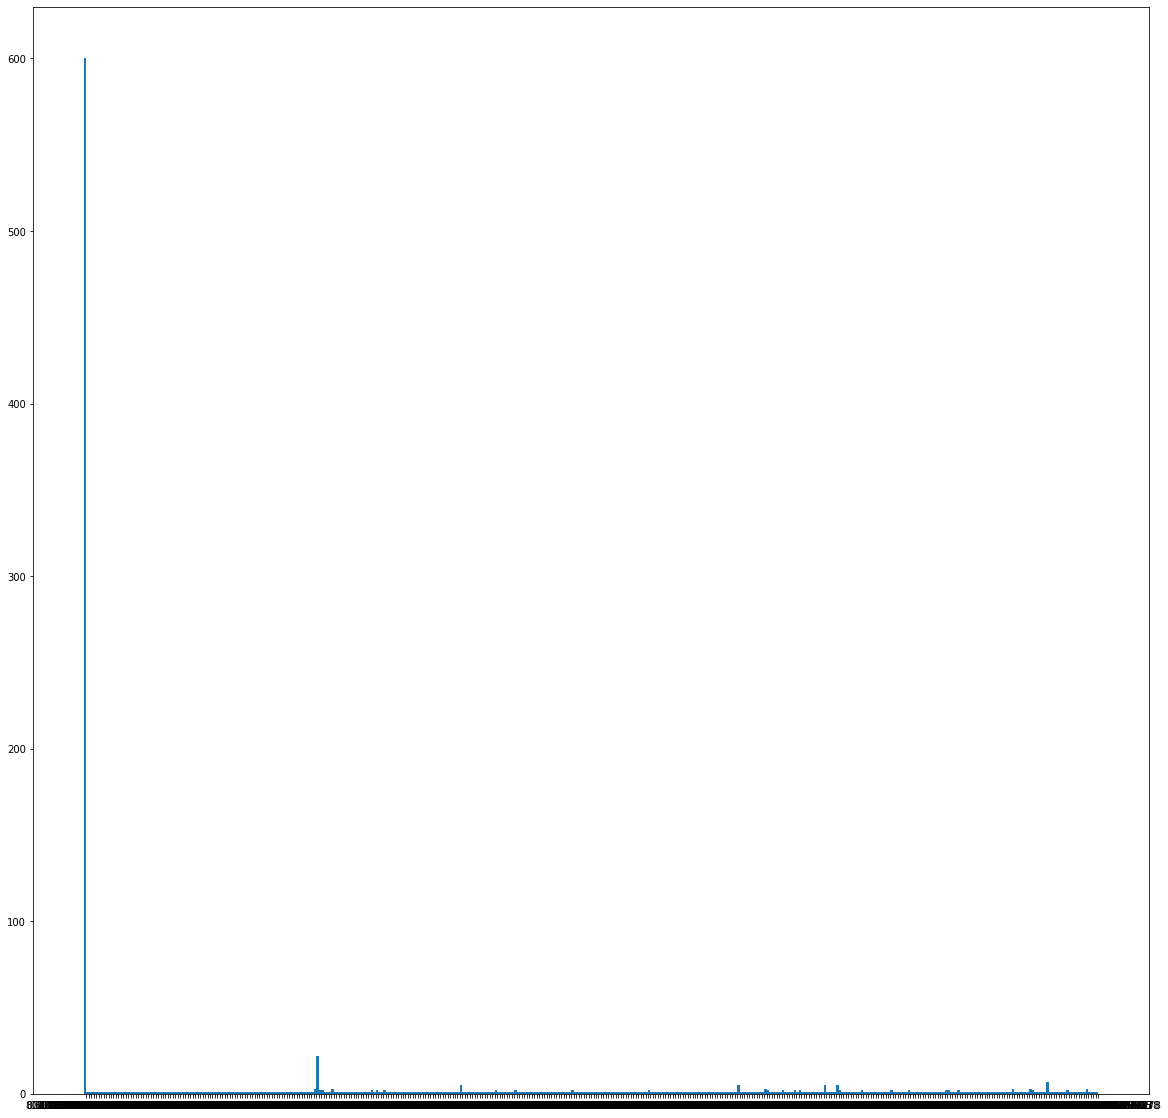

In [54]:
btwcent = dict(nx.betweenness_centrality(Comunity)).values()
c = Counter(btwcent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

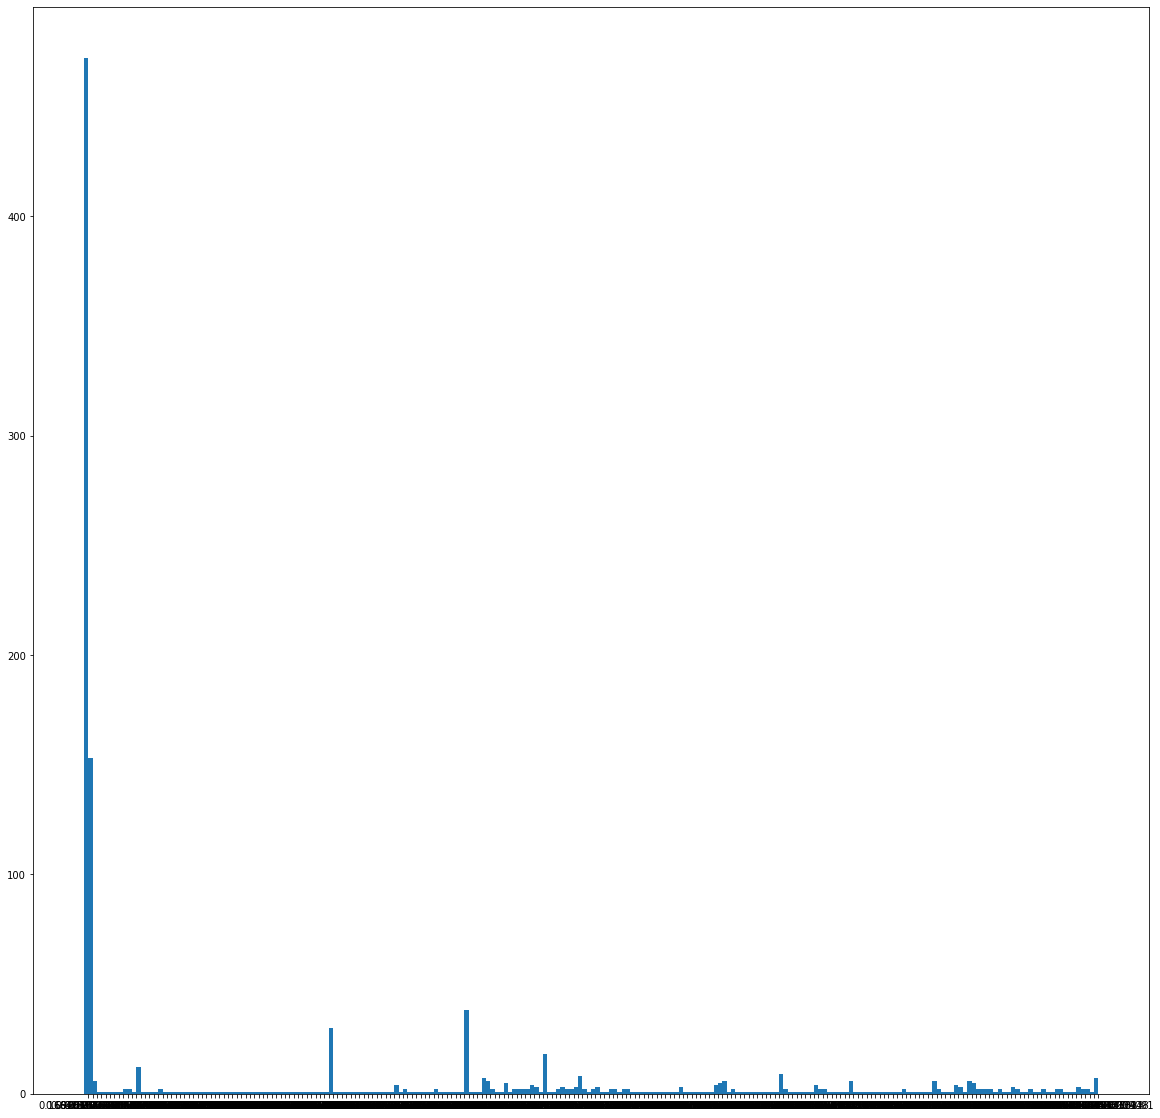

In [55]:
culcoef = dict(nx.clustering(Comunity)).values()
c = Counter(culcoef)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

### Question # 4:

In [56]:
ListOfNodes = Comunity.nodes()
NumberofNodes = Comunity.number_of_nodes()

In [57]:
import random
sample = 7
RandomSample = random.sample(ListOfNodes, sample)
print('Random node to be removed is: ', RandomSample)

Random node to be removed is:  [715, 1171, 1435, 80, 404, 1123, 608]


In [58]:
Comunity.remove_nodes_from(RandomSample)

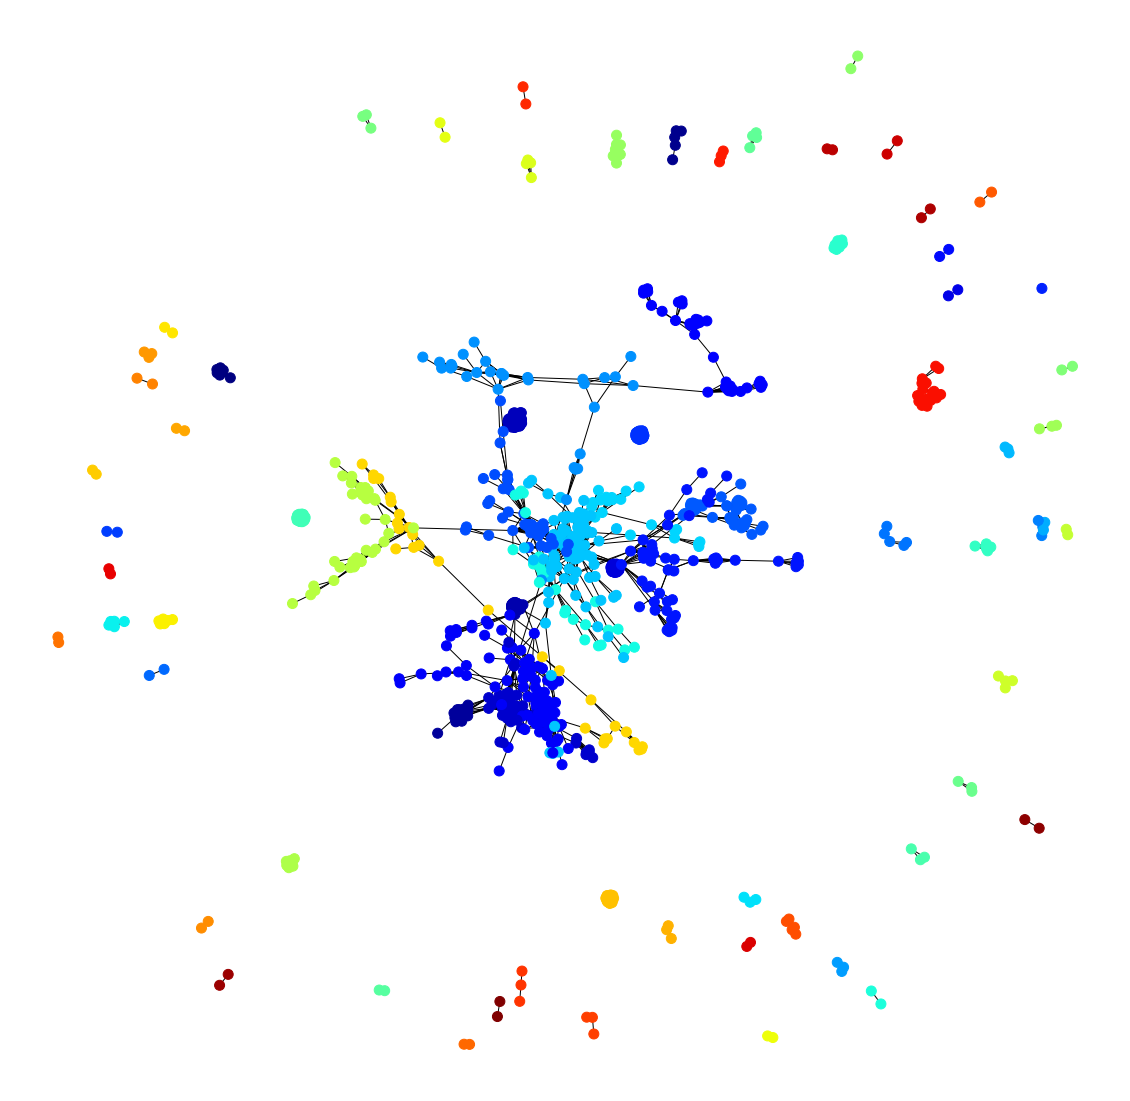

In [59]:
spring_pos = nx.spring_layout(Comunity)
parts = community.best_partition(Comunity)
values = [parts.get(node) for node in Comunity.nodes()]
plt.figure(figsize=(20,20))
plt.axis("off")
nx.draw_networkx(Comunity, pos=spring_pos, cmap=plt.get_cmap("jet"), node_color=values, node_size=100, with_labels=False)
plt.show()

In [60]:
community.modularity(parts,Comunity)

0.8881670150834462

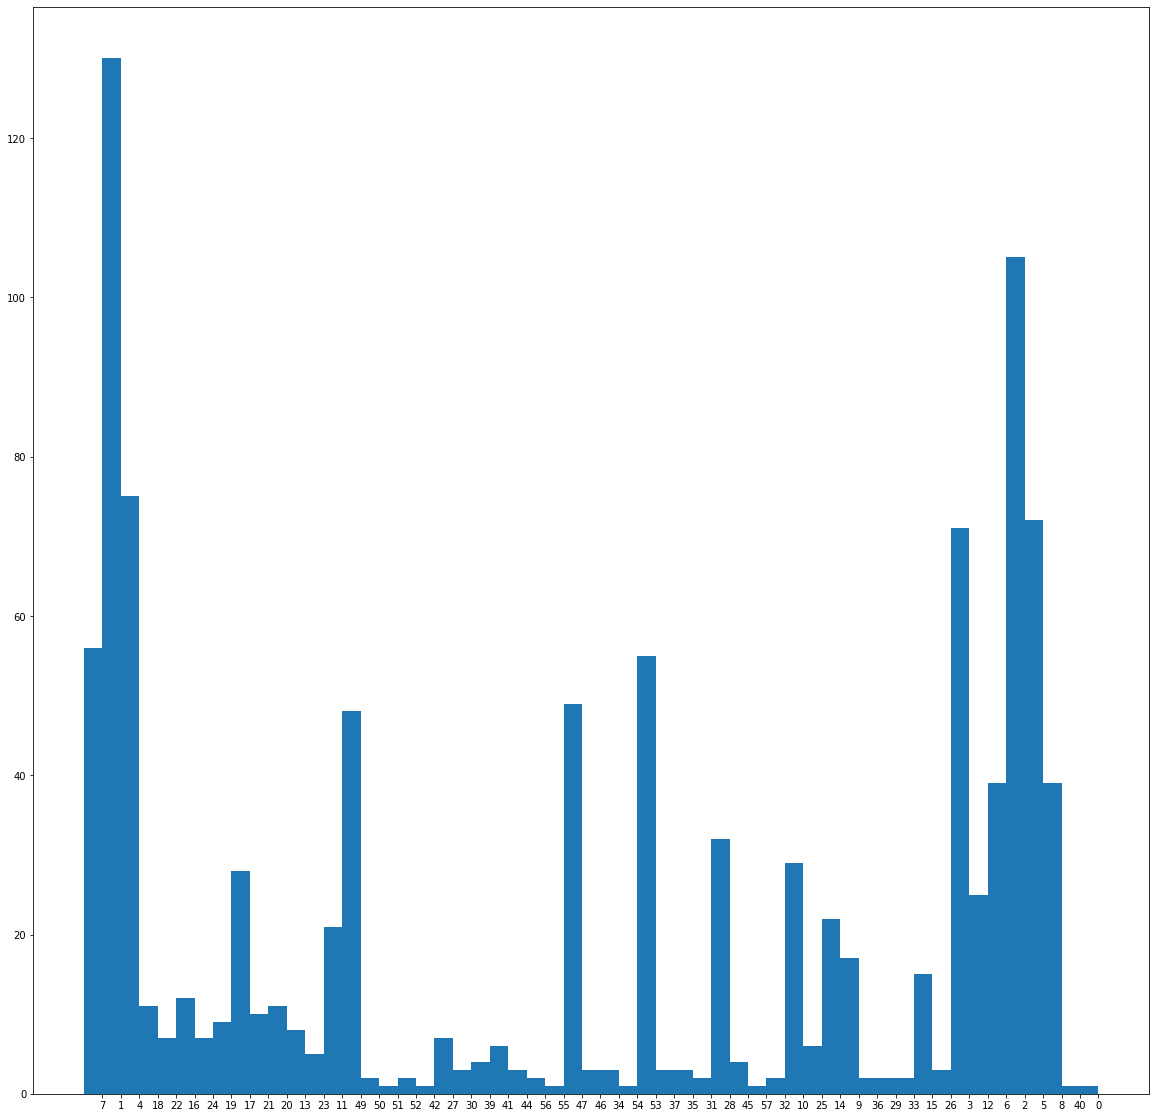

In [ ]:
degcent = dict(nx.degree(Comunity)).values()
c = Counter(degcent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

eigcent = dict(nx.eigenvector_centrality(Comunity)).values()
c = Counter(eigcent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

clocent = dict(nx.closeness_centrality(Comunity)).values()
c = Counter(clocent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

btwcent = dict(nx.betweenness_centrality(Comunity)).values()
c = Counter(btwcent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

culcoef = dict(nx.clustering(Comunity)).values()
c = Counter(culcoef)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()